<a href="https://colab.research.google.com/github/SushRed10/22MCB0005/blob/main/22MCB0005_Sentiment_Analysis_Assessment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:    G.SAI SUSHANTH REDDY

Reg.No:  22MCB0005

Subject: Social Network Analytics 

#Sentiment Analysis on Hotel Reviews dataset

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import statistics as st
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
!pip install transformers

In [ ]:
!pip install keras

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Hotel_Reviews.csv',nrows=1000)

# append the positive and negative text reviews
df["review"] = df["Negative_Review"] + df["Positive_Review"]
# create the label
df["is_bad_review"] = df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
reviews_df = df[["review", "is_bad_review"]]
reviews_df.head(10)

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0
5,Backyard of the hotel is total mess shouldn t...,0
6,Cleaner did not change our sheet and duvet ev...,1
7,Apart from the price for the brekfast Everyth...,0
8,Even though the pictures show very clean room...,0
9,The aircondition makes so much noise and its ...,0


In [7]:
#Run only once to get shuffled
#reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)
#reviews_df

,review,is_bad_review
521,Ex Suite was extremely small smaller then our...,0
737,Bar drinks are a silly price Very good hotel...,0
740,Being in the basement Although we were in a b...,0
660,1 Didn t feel that the executive room was any...,0
411,The room for three people was on the small si...,0
...,...,...
436,breakfast the same everyday not much options ...,0
764,Small rooms Comfortable beds and great location,0
88,No ground floor room as requested 2 months ag...,0
63,Very bad attitude of personnel at Breakfast O...,0


In [9]:
# remove 'No Negative' or 'No Positive' from text
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [10]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Decision Tree Classifier

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X = df['review']
y = df['is_bad_review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [13]:

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the sentiment for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.92


#Naive Bayes classifier

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict the sentiment for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.955


In [17]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [118]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)
reviews_df

<ipython-input-118-ae4e333e7605>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))


,review,is_bad_review,review_clean,neg,neu,pos,compound
0,I am so angry that i made this post available...,1,angry make post available via possible site us...,0.083,0.859,0.058,-0.8589
1,No real complaints the hotel was great great ...,0,real complaint hotel great great location surr...,0.058,0.757,0.186,0.9494
2,Rooms are nice but for elderly a bit difficul...,0,room nice elderly bit difficult room two story...,0.111,0.671,0.218,0.8402
3,My room was dirty and I was afraid to walk ba...,1,room dirty afraid walk barefoot floor look cle...,0.099,0.754,0.147,0.9355
4,You When I booked with your company on line y...,0,book company line show picture room think get ...,0.058,0.861,0.081,0.5263
...,...,...,...,...,...,...,...
995,Great location room was outstanding beds were...,0,great location room outstanding bed clean comf...,0.000,0.485,0.515,0.9693
996,The cleaner knocked on our door at 8am which ...,0,cleaner knock door ideal check day need clean ...,0.037,0.633,0.330,0.9709
997,This was my second time at this hotel the fir...,0,second time hotel first time book basic room p...,0.000,0.853,0.147,0.8481
998,Going as a family with two rooms hired in the...,0,go family two room hire reservation allocate t...,0.000,1.000,0.000,0.0000


In [18]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

Gensim Doc2Vec model

In [19]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [20]:
# add tf-idfs columns

from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tfidf = TfidfVectorizer(min_df=10)
# Fit and transform the text data
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame with the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_result, columns=feature_names)
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index

reviews_df.head()

,review,is_bad_review,review_clean,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
521,Ex Suite was extremely small smaller then our...,0,ex suite extremely small small yacht cabin wee...,163,32,-0.040725,0.028406,0.083889,0.020994,-0.072970
737,Bar drinks are a silly price Very good hotel...,0,bar drink silly price good hotel one best stay...,89,21,0.019840,-0.059384,-0.040045,0.060306,0.058073
740,Being in the basement Although we were in a b...,0,basement although basement room quiet,77,17,-0.028626,-0.035459,-0.078499,0.050529,-0.019963
660,1 Didn t feel that the executive room was any...,0,feel executive room anything amazing bathrobe ...,290,58,0.029512,0.019779,0.123955,-0.129774,-0.087634
411,The room for three people was on the small si...,0,room three people small side beautiful garden ...,250,49,0.052323,0.122745,0.195354,-0.184270,0.035999


In [122]:
reviews_df.shape

(1000, 14)

In [123]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.952
1    0.048
Name: is_bad_review, dtype: float64

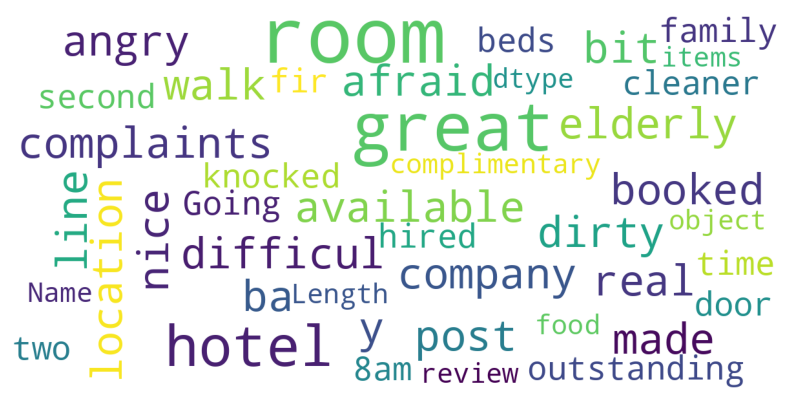

In [124]:
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review"])

In [125]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values(by="pos", ascending=False)[["review", "pos"]].head(10)

,review,pos
741,lovely helpful staff great location,0.843
936,Great location great staff comfortable rooms,0.793
965,Friendly staff great breakfast,0.785
755,Lovely comfortable beds pillows,0.780
821,N a Perfect location excellent facilitie help...,0.773
858,very clean friendly staff excellent breakfast,0.772
358,Good staff very helpful Free WIFI Nice hotel,0.756
812,Good location Comfortable room,0.756
945,Friendly staff good location,0.753
387,Great and beautiful hotel with wonderful staff,0.745


In [126]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
710,the breakfast sucks in every aspect variety q...,0.567
708,NOTHING lOCATION WAS GREAT,0.561
388,The mattress was awful,0.500
363,Plain 4 stars Hotel nothing special nothing bad,0.481
840,we didn t dislike anything,0.464
759,Small room broken tv Location,0.437
851,triple room very poor for 3 adults,0.404
697,Air conditioning very noisy,0.399
958,Nothing Location friendly staff garden,0.396
818,Air condition was poor Air condition,0.383


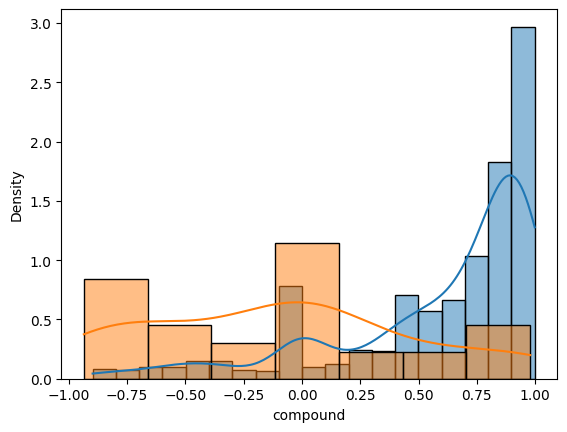

In [127]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    #sns.distplot(subset['compound'], hist = False, label = label)
    #sns.distplot(subset["compound"])
    sns.histplot(subset["compound"], kde=True, stat="density")

